<a href="https://colab.research.google.com/github/Chehika/PREDICTIVE-ANALYSIS-USING-MACHINE-LEARNING/blob/main/predictive_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

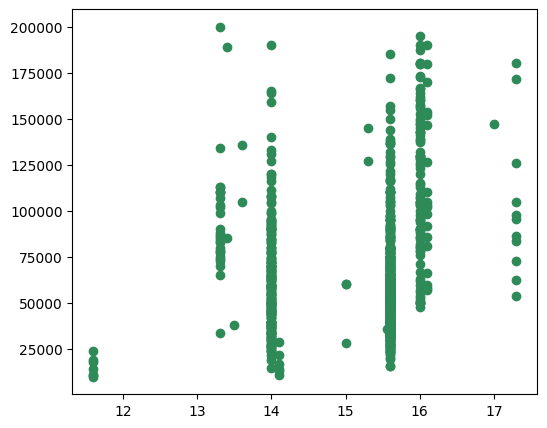

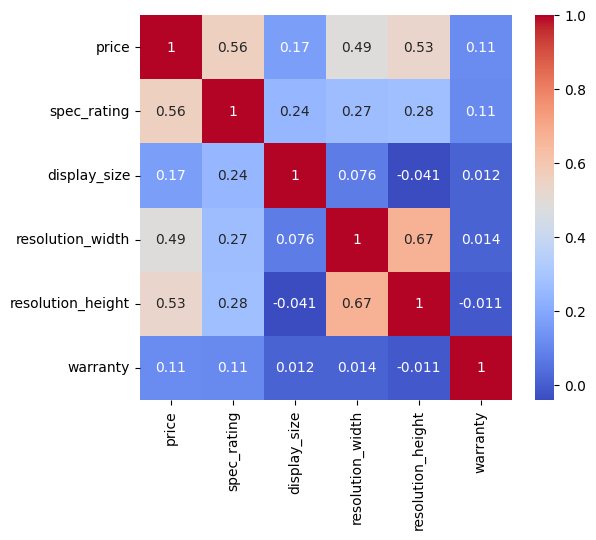

     Actual     Predicted
540   14490  11640.500623
425   41990  32621.909473
580   50990  50773.662414
317   61990  67894.898929
195   50990  52062.995660
Accuracy of the model:  0.8240529613955947


In [12]:
# importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#load dataset
data= pd.read_csv('/content/data.csv')

#data cleaning
data.isnull().sum()
data = data[data['price']<data['price'].quantile(0.95)]
data.drop(['id','Unnamed','name'],axis=1,inplace=True)

#visualization
#scatter plot

plt.figure(figsize=(6,5))
plt.scatter(data['display_size'],data['price'],color='seagreen')
plt.show()

#heatmap
plt.figure(figsize=(6,5))
sns.heatmap(data.corr(numeric_only=True),annot=True,cmap='coolwarm')
plt.show()

#encoding categorical features
data_encoded = pd.get_dummies(data,drop_first=True)
x=data_encoded.drop('price',axis=1)
y=data_encoded['price']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

#model

x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.3,random_state=2)
regr=LinearRegression()
regr.fit(x_train,y_train)
#predicting
y_pred = regr.predict(x_test)

#actual vs predicted comparison
comparison_df = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
print(comparison_df.head())

#accuracy of model
print("Accuracy of the model: ", regr.score(x_test,y_test))